IMPORTS

In [1]:
import os

print(os.getcwd())
print(os.listdir())


c:\Users\SAMSUNG\Documents\LimbQuest
['limbquest_synthetic_10k.csv', 'logistic_regression.ipynb']


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, accuracy_score
import copy
import pickle

UTILITY FUNCTION

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0.
    for i in range(m):
        f_wb_i = sigmoid(np.dot(w, x[i]) + b)
        err_i = f_wb_i - y[i]
        dj_dw += err_i * x[i]
        dj_db += err_i
    return dj_dw / m, dj_db / m

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, verbose=False):
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        if verbose and (i % 500 == 0 or i == num_iters - 1):
            print(f'Iteration {i+1}/{num_iters}')
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
    return w, b

def predict(x, w, b):
    z = np.dot(x, w) + b
    return (sigmoid(z) >= 0.5).astype(int)

LOAD DATASET

In [10]:
df = pd.read_csv("logistic_regression_synthetic_dataset.csv")
df.head()
df['good_recovery'].value_counts(normalize=True)

good_recovery
1    0.9377
0    0.0623
Name: proportion, dtype: float64

In [5]:
# Features and target
features = ["accuracy", "reaction_time", "waves_survived"]
x = df[features].values
y = df["good_recovery"].values 

TRAIN/TEST SPLIT AND SCALING

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


MODEL TRAINING

In [7]:
w_in = np.zeros(x_train_scaled.shape[1])
b_in = 0.0
alpha = 1.0e-2      
num_iters = 10000   

w_final, b_final = gradient_descent(
    x_train_scaled, y_train,
    w_in, b_in,
    alpha, num_iters,
    verbose=True
)

Iteration 1/10000
Iteration 501/10000
Iteration 1001/10000
Iteration 1501/10000
Iteration 2001/10000
Iteration 2501/10000
Iteration 3001/10000
Iteration 3501/10000
Iteration 4001/10000
Iteration 4501/10000
Iteration 5001/10000
Iteration 5501/10000
Iteration 6001/10000
Iteration 6501/10000
Iteration 7001/10000
Iteration 7501/10000
Iteration 8001/10000
Iteration 8501/10000
Iteration 9001/10000
Iteration 9501/10000
Iteration 10000/10000


TRAIN/TEST EVALUATION

In [8]:
train_preds = predict(x_train_scaled, w_final, b_final)
test_preds = predict(x_test_scaled, w_final, b_final)

acc_train = accuracy_score(y_train, train_preds)
acc_test = accuracy_score(y_test, test_preds)

print(f"\nTraining Accuracy: {acc_train:.3f}")
print(f"Test Accuracy: {acc_test:.3f}")



Training Accuracy: 0.938
Test Accuracy: 0.938


ROC CURVE

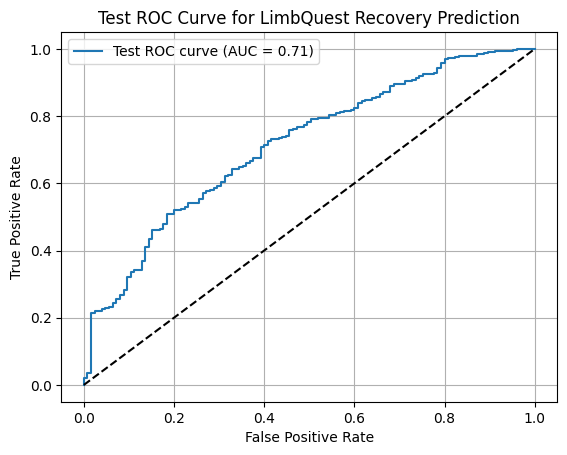

In [9]:
prob_test = sigmoid(np.dot(x_test_scaled, w_final) + b_final)
fpr_test, tpr_test, _ = roc_curve(y_test, prob_test)
auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, label=f"Test ROC curve (AUC = {auc_test:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Test ROC Curve for LimbQuest Recovery Prediction")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()